In [1]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw

from numpy import nan
from rdkit.Chem import rdChemReactions
from molvs import standardize_smiles

In [2]:
def standartize_all(comps):
    if not comps:
        return ""
    return ".".join([standardize_smiles(i) for i in comps.split(".")])

def standardize_reaction(rxn_smi):
    if isinstance(rxn_smi, float):
        # NaN
        return ''
    _reactants, _prods = rxn_smi.split(">>")
    _reactants = _reactants.rstrip('.').replace('..', '.')

    standartized_smi = standartize_all(_reactants) + ">>" + standartize_all(
        standartize_all(_prods))
    return standartized_smi

In [3]:
from IPython.display import SVG, display

def display_reaction(smarts):
    rxn = AllChem.ReactionFromSmarts(smarts, useSmiles=True)
    d = Draw.MolDraw2DSVG(600, 300)
    d.DrawReaction(rxn)
    d.FinishDrawing()

    svg = d.GetDrawingText()
    svg2 = svg.replace('svg:','').replace(':svg', '')
    svg3 = SVG(svg2)
    display(svg3)

# ====================

In [4]:
ag_smiles = [('sodium hydroxide', '[OH-].[Na+]'),
 ('water', 'O'),
 ('acetic acid', 'CC(=O)O'),
 ('sodium methylate', 'C[O-].[Na+]'),
 ('triethylamine', 'CCN(CC)CC'),
 ('n-ethyl-n,n-diisopropylamine', 'CCN(C(C)C)C(C)C'),
 ('tartaric acid', 'C(C(C(=O)O)O)(C(=O)O)O'),
 ('hydrogenchloride', 'Cl'),
 ('cerium(iii) chloride', '[Cl-].[Cl-].[Cl-].[Ce+3]'),
 ('n-butyllithium', '[Li]CCCC'),
 ('sulfuric acid', 'OS(=O)(=O)O'),
 ('potassium tert-butylate', 'CC(C)(C)[O-].[K+]'),
 ('palladium diacetate', 'CC(=O)[O-].CC(=O)[O-].[Pd+2]'),
 ('triphenylphosphine', 'c1ccc(cc1)P(c2ccccc2)c3ccccc3'),
 ('sodium tetrahydroborate', '[BH4-].[Na+]'),
 ('toluene-4-sulfonic acid', 'Cc1ccc(cc1)S(=O)(=O)O'),
 ('citric acid', 'C(C(=O)O)C(CC(=O)O)(C(=O)O)O'),
 ('dmap', 'CN(C)c1ccncc1'),
 ('sodium hydride', '[H-].[Na+]'),
 ('lithium chloride', '[Cl-].[Li+]'),
 ('caesium carbonate', 'C(=O)([O-])[O-].[Cs+].[Cs+]'),
 ('sodium chloride', '[Cl-].[Na+]'),
 ('sodium t-butanolate', 'CC(C)(C)[O-].[Na+]'),
 ('ethanol', 'CCO'),
 ('methanesulfonyl chloride', 'CS(=O)(=O)Cl'),
 ('pyridine', 'c1ccncc1'),
 ('methanol', 'CO'),
 ('potassium hydroxide', '[OH-].[K+]'),
 ('C38H54FeN2O2(1+)*Cl(1-)', ''),
 ('(-)-diisopinocamphenylborane chloride', 'B([C@@H]1C[C@@H]2C[C@@H]([C@@H]1C)C2(C)C)[C@@H]3C[C@@H]4C[C@@H]([C@@H]3C)C4(C)C'),
 ('zinc(ii) chloride', '[Cl-].[Cl-].[Zn+2]'),
 ('lanthanum(iii) chloride', '[Cl-].[Cl-].[Cl-].[La+3]'),
 ('citric buffer', 'C(C(=O)O)C(CC(=O)O)(C(=O)O)O'),
 ('cerium chloride', '[Cl-].[Cl-].[Cl-].[Ce+3]'),
 ('3-ethyl-1-methyl-1h-imidazol-3-ium bromide', 'CCn1cc[n+](c1)C.[Br-]'),
 ('pyridinium p-toluenesulfonate', 'Cc1ccc(cc1)S(=O)(=O)[O-].c1cc[nH+]cc1'),
 ('toluene-4-sulfonamide', 'Cc1ccc(cc1)S(=O)(=O)N'),
 ('hydrazine', 'NN'),
 ('ammonium chloride', '[NH4+].[Cl-]'),
 ('ethyl acetate', 'CCOC(=O)C'),
 ('sodium hexamethyldisilazane', 'C[Si](C)(C)[N-][Si](C)(C)C.[Na+]'),
 ('lithium tert-butoxide', 'CC(C)(C)[O-].[Li+]'),
 ('18-crown-6 ether', 'C1COCCOCCOCCOCCOCCO1'),
 ('potassium 2-methylbutan-2-olate', 'CCC(C)(C)[O-].[K+]'),
 ('C38H54ClFeN2O2', ''),
 ('1-butyl-1-methylpyrrolidinium hexafluorophosphate', 'CCCC[N+]1(CCCC1)C.F[P-](F)(F)(F)(F)F'),
 ('sodium hydrogencarbonate', 'C(=O)(O)[O-].[Na+]'),
 ('1,8-diazabicyclo[5.4.0]undec-7-ene', 'C1CCC2=NCCCN2CC1'),
 ('caustic lye', '[OH-].[Na+]'),
 ('silica gel', ''),
 ('toluene', 'Cc1ccccc1'),
 ('methyllithium', '[Li]C'),
 ('lithium bromide', '[Br-].[Li+]'),
 ('pyrographite', ''),
 ('sodium acetate', 'CC(=O)[O-].[Na+]'),
 ('aminoguanidine bicarbonate', 'C(=N)(N)NN.C(=O)(O)O'),
 ('(1,4,7,10-tetraoxacyclododecane)', 'C1COCCOCCOCCO1'),
 ('15-crown-5', 'C1COCCOCCOCCOCCO1'),
 ('polyethyleneglycol-1500', ''),
 ('polyethyleneglycol-600', ''),
 ('piperidine', 'C1CCNCC1'),
 ('selenium(iv) oxide', 'O=[Se]=O'),
 ('(-)-diisochlorodiisopinocampheylborane', 'B([C@@H]1C[C@@H]2C[C@@H]([C@@H]1C)C2(C)C)[C@@H]3C[C@@H]4C[C@@H]([C@@H]3C)C4(C)C'),
 ('1,2-dichloro-ethane', 'C(CCl)Cl'),
 ('1-methyl-pyrrolidin-2-one', 'CN1CCCC1=O'),
 ('2-methyl-propan-1-ol', 'CC(C)CO'),
 ('4-methyl-2-pentanone', 'CC(C)CC(=O)C'),
 ('isopropyl acetate', 'CC(C)OC(=O)C'),
 ('n,n-dimethyl-formamide', 'CN(C)C=O'),
 ('acetone', 'CC(=O)C'),
 ('acetonitrile', 'CC#N'),
 ('butanone', 'CCC(=O)C'),
 ('dichloromethane', 'C(Cl)Cl'),
 ('diethyl ether', 'CCOCC'),
 ('dimethyl sulfoxide', 'CS(=O)C'),
 ('hexane', ''),
 ('hexane, n-', ''),
 ('hexanes', ''),
 ('isopropyl alcohol', 'CC(C)O'),
 ('mineral oil', ''),
 ('n-heptane', 'CCCCCCC'),
 ('tert-amyl alcohol', 'CCC(C)(C)O'),
 ('tert-butyl alcohol', 'CC(C)(C)O'),
 ('tert-butyl methyl ether', 'CC(C)(C)OC'),
 ('tetrahydrofuran', 'C1CCOC1'),
 ('water-d2', ''), 
 ('1,4-dioxane', 'C1COCCO1'), 
 ('benzene', 'c1ccccc1'),
 ('1,3-dimethylbarbituric acid', 'CN1C(=O)CC(=O)N(C1=O)C'),
 ('4-methyl-morpholine', 'CN1CCOCC1'),
 ('5% pd-caco3', 'c1ccc2c(c1)cccn2.[Pd]'),
 ("lindlar's catalyst", 'c1ccc2c(c1)cccn2.[Pd]'),
 ('ammonia', ''),
 ('ammonium hydroxide', '[OH-].[NH4+]'),
 ('boron trifluoride diethyl etherate', '[B-]([O+](CC)CC)(F)(F)F'),
 ('chloro-trimethyl-silane', 'C[Si](C)(C)Cl'),
 ('dicyclohexyl-carbodiimide', 'C1CCC(CC1)N=C=NC2CCCCC2'),
 ('diethylazodicarboxylate', 'CCOC(=O)N=NC(=O)OCC'),
 ('ethanolamine', 'C(CO)N'),
 ('ethylene glycol', 'C(CO)O'),
 ('fluorosulfonyl azide', ''),
 ('hydrazine hydrate', 'NN'),
 ('hydrogen', '[HH]'),
 ('hydrogen azide', 'N=[N+]=[N-]'),
 ('hydrogen bromide', 'Br'),
 ('hydrogen sulfide', 'S'),
 ('palladium on activated charcoal', '[Pd]'),
 ('potassium carbonate', 'C(=O)([O-])[O-].[K+].[K+]'),
 ('potassium hydrogencarbonate', 'C(=O)(O)[O-].[K+]'),
 ('pyrrolidine', 'C1CCNC1'),
 ('sodium azide', '[N-]=[N+]=[N-].[Na+]'),
 ('sodium sulfate', '[O-]S(=O)(=O)[O-].[Na+].[Na+]'),
 ('tetrakis(triphenylphosphine) palladium(0)', 'c1ccc(cc1)P(c2ccccc2)c3ccccc3.c1ccc(cc1)P(c2ccccc2)c3ccccc3.c1ccc(cc1)P(c2ccccc2)c3ccccc3.c1ccc(cc1)P(c2ccccc2)c3ccccc3.[Pd]'),
 ('tributylphosphine', 'CCCCP(CCCC)CCCC'),
 ('trifluoroacetic acid', 'C(=O)(C(F)(F)F)O'),
 ('trifluorormethanesulfonic acid', 'C(F)(F)(F)S(=O)(=O)O'),
 ('zinc', '[Zn]'), 
 ('4-methylmorpholine n-oxide', 'C[N+]1(CCOCC1)[O-]'),
 ('n-bromosuccinimide', 'C1CC(=O)N(C1=O)Br'),
 ('aluminum isopropoxide', 'CC(C)[O-].CC(C)[O-].CC(C)[O-].[Al+3]'),
 ('benzophenone', 'c1ccc(cc1)C(=O)c2ccccc2'),
 ('chlorosulfonic acid', 'OS(=O)(=O)Cl'),
 ('di-isopropyl azodicarboxylate', 'CC(C)OC(=O)N=NC(=O)OC(C)C'),
 ('lithium aluminium tetrahydride', '[Li+].[AlH4-]'),
 ('lithium borohydride', '[Li+].[BH4-]'),
 ('lithium hydroxide', '[OH-].[Li+]'),
 ('methylamine', 'CN'),
 ('palladium 10% on activated carbon', '[Pd]'),
 ('phosphorus pentachloride', 'P(Cl)(Cl)(Cl)(Cl)Cl'),
 ('sodium carbonate', 'C(=O)([O-])[O-].[Na+].[Na+]'),
 ('sodium dihydrogenphosphate', 'OP(=O)(O)[O-].[Na+]'),
 ('sodium sulfite', '[O-]S(=O)[O-].[Na+].[Na+]'),
 ('tetrapropylammonium perruthennate', 'CCC[N+](CCC)(CCC)CCC.[O-][Ru](=O)(=O)=O'),
 ('triethanolamine', 'C(CO)N(CCO)CCO')]

ag_smiles = dict(ag_smiles)

In [5]:
import pandas as pd

In [6]:
path = "/home/andronov/Документы/reaxys/"

In [7]:
names = {"1": "montelucast", 
         "2": "oseltamivir", 
         "3": "esomeprasole", 
         "4": "atorvastatin", 
         "5": "darunavir", 
         "6": "lopinavir", 
         "7": "ritonavir", 
         "8": "lisinopril", 
         "9": "ibuprofen", 
         "10": "apixaban", 
         "11": "chloroquine", 
         "12": "codeine", 
         "13": "lenalidomide"}

In [8]:
filename = "2.xls"

In [9]:
data = pd.read_csv(path + filename, sep="\t")

In [10]:
data.head()

,Reaction ID,Reaction: Links to Reaxys,Data Count,Number of Reaction Details,Reaction Rank,Record Type,Reactant,Product,Bin,Reaction,...,Yield,Yield (numerical),Yield (optical),Stage Reactant,Reagent,Catalyst,Solvent (Reaction Details),References,Links to Reaxys,Unnamed: 41
0,9700434,https://www.reaxys.com/reaxys/secured/hopinto....,(1 of 39),5,105,full reaction; has preparation,"ethyl (3R,4R,5S)-4-N-acetylamino-5-N,N-diallyl...",oseltamivir,288385,CCOC(=O)C1=C[C@@H](OC(CC)CC)[C@H](NC(C)=O)[C@H...,...,88.7 percent,88.7,NaN,NaN,"1,3-dimethylbarbituric acid",NaN,tetrahydrofuran,NaN,NaN,NaN
1,9700434,https://www.reaxys.com/reaxys/secured/hopinto....,(1 of 39),5,105,full reaction; has preparation,"ethyl (3R,4R,5S)-4-N-acetylamino-5-N,N-diallyl...",oseltamivir,288385,CCOC(=O)C1=C[C@@H](OC(CC)CC)[C@H](NC(C)=O)[C@H...,...,NaN,NaN,NaN,NaN,"tetrakis(triphenylphosphine) palladium(0); 1,3...",NaN,NaN,NaN,NaN,NaN
2,9700434,https://www.reaxys.com/reaxys/secured/hopinto....,(1 of 39),5,105,full reaction; has preparation,"ethyl (3R,4R,5S)-4-N-acetylamino-5-N,N-diallyl...",oseltamivir,288385,CCOC(=O)C1=C[C@@H](OC(CC)CC)[C@H](NC(C)=O)[C@H...,...,NaN,NaN,NaN,NaN,"1,3-dimethylbarbituric acid",NaN,ethanol,NaN,NaN,NaN
3,9700434,https://www.reaxys.com/reaxys/secured/hopinto....,(1 of 39),5,105,full reaction; has preparation,"ethyl (3R,4R,5S)-4-N-acetylamino-5-N,N-diallyl...",oseltamivir,288385,CCOC(=O)C1=C[C@@H](OC(CC)CC)[C@H](NC(C)=O)[C@H...,...,NaN,NaN,NaN,NaN,"1,3-dimethylbarbituric acid; palladium diaceta...",NaN,ethanol,NaN,NaN,NaN
4,9700434,https://www.reaxys.com/reaxys/secured/hopinto....,(1 of 39),5,105,full reaction; has preparation,"ethyl (3R,4R,5S)-4-N-acetylamino-5-N,N-diallyl...",oseltamivir,288385,CCOC(=O)C1=C[C@@H](OC(CC)CC)[C@H](NC(C)=O)[C@H...,...,NaN,NaN,NaN,NaN,"1,3-dimethylbarbituric acid; palladium diaceta...",NaN,ethanol,NaN,NaN,NaN


In [11]:
# Working with only some columns
chosen_columns = ["Product", 
                  "Reaction", 
                  "Number of Reaction Steps", 
                  "Number of Reaction Details", 
                  "Number of Stages", 
                  "Reaction Type", 
                  "Reagent", 
                  "Solvent (Reaction Details)"]
essent = data[chosen_columns]

In [12]:
# Determining agents and solvents
from collections import Counter
reagents_counter = Counter(";".join(list(
    essent["Reagent"].dropna().values)).replace("; ", ";").split(';'))
solvent_counter = Counter(";".join(list(
    essent["Solvent (Reaction Details)"].dropna().values)).replace("; ", ";").split(';'))

# reagents_counter
# solvent_counter


In [13]:
# Obtaining reaction smiles for all agents combined
agents = essent[["Reagent", "Solvent (Reaction Details)"]].fillna('')
agents_cat = agents["Reagent"].str.cat(agents["Solvent (Reaction Details)"], sep=';')
agents_set = agents_cat.str.replace('; ', ';').str.split(';').apply(lambda x: set(x) - set(['']))
agents_smiles = agents_set.apply(lambda x: '.'.join([ag_smiles[i.lower()] if i.lower() in ag_smiles else '' for i in x]))

In [14]:
# Constructing whole reaction smiles with agents
reag_prod_smi = essent["Reaction"].str.split('>>', expand=True)
reag_prod_smi = pd.concat((reag_prod_smi, agents_smiles), axis=1)
reag_prod_smi.columns = ["reag", "prod", "ag"]
empty_reag_index = reag_prod_smi[reag_prod_smi['reag'] == ''].index
reaction_smi_with_agents = reag_prod_smi['reag'].str.cat(reag_prod_smi['ag'], sep='.').str.cat(reag_prod_smi['prod'], sep='>>')

In [15]:
reaction_smi_with_agents

0      CCOC(=O)C1=C[C@@H](OC(CC)CC)[C@H](NC(C)=O)[C@H...
1      CCOC(=O)C1=C[C@@H](OC(CC)CC)[C@H](NC(C)=O)[C@H...
2      CCOC(=O)C1=C[C@@H](OC(CC)CC)[C@H](NC(C)=O)[C@H...
3      CCOC(=O)C1=C[C@@H](OC(CC)CC)[C@H](NC(C)=O)[C@H...
4      CCOC(=O)C1=C[C@@H](OC(CC)CC)[C@H](NC(C)=O)[C@H...
                             ...                        
118    CCC(O)CC.[H][C@]12C=C(C[C@H](N=N#N)[C@@]1([H])...
119    CCOC(=O)[C@@H]1C[C@H](NC(=O)OC(C)(C)C)[C@@H](N...
120    .>>CCOC(=O)C1=C[C@@H](OC(CC)CC)[C@H](NC(C)=O)[...
121    .>>CCOC(=O)C1=C[C@@H](OC(CC)CC)[C@H](NC(C)=O)[...
122    .>>CCOC(=O)C1=C[C@@H](OC(CC)CC)[C@H](NC(C)=O)[...
Name: reag, Length: 123, dtype: object

In [16]:
# Dropping reactions with absent reactant
essent = pd.concat((essent.drop("Reaction", axis=1), reaction_smi_with_agents), axis=1)
essent = essent.drop(empty_reag_index)
essent

,Product,Number of Reaction Steps,Number of Reaction Details,Number of Stages,Reaction Type,Reagent,Solvent (Reaction Details),reag
0,oseltamivir,1,5,NaN,NaN,"1,3-dimethylbarbituric acid",tetrahydrofuran,CCOC(=O)C1=C[C@@H](OC(CC)CC)[C@H](NC(C)=O)[C@H...
1,oseltamivir,1,5,NaN,NaN,"tetrakis(triphenylphosphine) palladium(0); 1,3...",NaN,CCOC(=O)C1=C[C@@H](OC(CC)CC)[C@H](NC(C)=O)[C@H...
2,oseltamivir,1,5,NaN,NaN,"1,3-dimethylbarbituric acid",ethanol,CCOC(=O)C1=C[C@@H](OC(CC)CC)[C@H](NC(C)=O)[C@H...
3,oseltamivir,1,5,NaN,NaN,"1,3-dimethylbarbituric acid; palladium diaceta...",ethanol,CCOC(=O)C1=C[C@@H](OC(CC)CC)[C@H](NC(C)=O)[C@H...
4,oseltamivir,1,5,NaN,NaN,"1,3-dimethylbarbituric acid; palladium diaceta...",ethanol,CCOC(=O)C1=C[C@@H](OC(CC)CC)[C@H](NC(C)=O)[C@H...
...,...,...,...,...,...,...,...,...
115,oseltamivir,1,1,2.0,NaN,hydrogenchloride; water,NaN,CCC(CC)O[C@@H]1C=C(C[C@H](NC(=O)OC(C)(C)C)[C@H...
116,"oseltamivir; ethyl (3R,4R,5S)-5-N-allylamino-4...",1,1,NaN,NaN,sodium sulfate,ethyl acetate,[Ar].[Na+].OC([O-])=O.NCC=C.CCOC(=O)C.[O-]S(=O...
117,"oseltamivir; ethyl (3R,4R,5S)-4-N-acetylamino-...",1,1,NaN,NaN,ethylene glycol,ethanol,CCOC(=O)C1=C[C@@H](OC(CC)CC)[C@H](NC(C)=O)[C@H...
118,oseltamivir,1,1,NaN,NaN,boron trifluoride diethyl etherate,NaN,CCC(O)CC.[H][C@]12C=C(C[C@H](N=N#N)[C@@]1([H])...


In [17]:
# Dropping duplicates
essent_no_dupl = essent.drop_duplicates(subset="reag")

In [18]:
# Leaving only single-step reactions
final = essent_no_dupl[essent_no_dupl["Number of Reaction Steps"] == 1]

In [19]:
final.shape

(74, 8)

In [20]:
final.head()

,Product,Number of Reaction Steps,Number of Reaction Details,Number of Stages,Reaction Type,Reagent,Solvent (Reaction Details),reag
0,oseltamivir,1,5,NaN,NaN,"1,3-dimethylbarbituric acid",tetrahydrofuran,CCOC(=O)C1=C[C@@H](OC(CC)CC)[C@H](NC(C)=O)[C@H...
1,oseltamivir,1,5,NaN,NaN,"tetrakis(triphenylphosphine) palladium(0); 1,3...",NaN,CCOC(=O)C1=C[C@@H](OC(CC)CC)[C@H](NC(C)=O)[C@H...
2,oseltamivir,1,5,NaN,NaN,"1,3-dimethylbarbituric acid",ethanol,CCOC(=O)C1=C[C@@H](OC(CC)CC)[C@H](NC(C)=O)[C@H...
3,oseltamivir,1,5,NaN,NaN,"1,3-dimethylbarbituric acid; palladium diaceta...",ethanol,CCOC(=O)C1=C[C@@H](OC(CC)CC)[C@H](NC(C)=O)[C@H...
5,oseltamivir,1,6,NaN,NaN,trifluoroacetic acid,dichloromethane,CCOC(=O)C1=C[C@@H](OC(CC)CC)[C@H](NC(C)=O)[C@H...


In [22]:
final_stand_smiles = final['reag'].apply(lambda x: standardize_reaction(x))

In [23]:
final_stand_smiles

0      C=CCN(CC=C)[C@H]1CC(C(=O)OCC)=C[C@@H](OC(CC)CC...
1      C=CCN(CC=C)[C@H]1CC(C(=O)OCC)=C[C@@H](OC(CC)CC...
2      C=CCN(CC=C)[C@H]1CC(C(=O)OCC)=C[C@@H](OC(CC)CC...
3      C=CCN(CC=C)[C@H]1CC(C(=O)OCC)=C[C@@H](OC(CC)CC...
5      CCOC(=O)C1=C[C@@H](OC(CC)CC)[C@H](NC(C)=O)[C@@...
                             ...                        
115    CCC(CC)O[C@@H]1C=C(C#N)C[C@H](NC(=O)OC(C)(C)C)...
116    [Ar].[Na+].O=C([O-])O.C=CCN.CCOC(C)=O.O=S(=O)(...
117    C=CCN[C@H]1CC(C(=O)OCC)=C[C@@H](OC(CC)CC)[C@@H...
118    CCC(O)CC.CCOC(=O)C1=C[C@H]2[C@@H]([C@@H](N=[N+...
119    CCOC(=O)[C@@H]1C[C@H](NC(=O)OC(C)(C)C)[C@@H](N...
Name: reag, Length: 74, dtype: object

In [24]:
# Save to further manual corrections
save_path = "data/oseltamivir_agents.csv"
final_stand_smiles.to_csv(save_path, header=None, index=None)

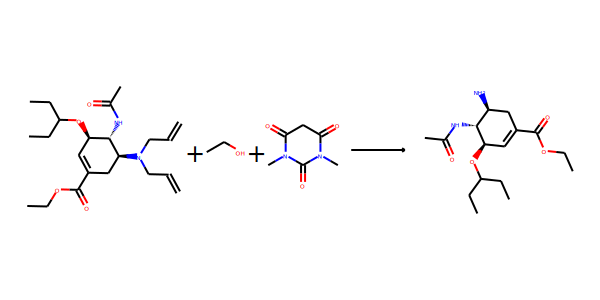

In [25]:
display_reaction(final_stand_smiles.iloc[2])